In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mplhep
mplhep.style.use(mplhep.style.LHCb2)

In [3]:
crys_mu_val = np.fromfile('mc_results/crys_mu_val')
crys_mu_err = np.fromfile('mc_results/crys_mu_err')
crys_diff_val = np.fromfile('mc_results/crys_diff_val')
crys_diff_err = np.fromfile('mc_results/crys_diff_err')

In [4]:
len(crys_mu_val)

2709

In [5]:
np.quantile(crys_mu_val, .5+.68/2) - np.quantile(crys_mu_val, .5)

0.006800248291256139

In [31]:
(1968.3-1968.22)/50

0.0015999999999985449

In [48]:
print(f"{np.mean(crys_mu_val)} +- {np.mean(crys_mu_err)}")

1968.2683742598658 +- 0.005350902748861482


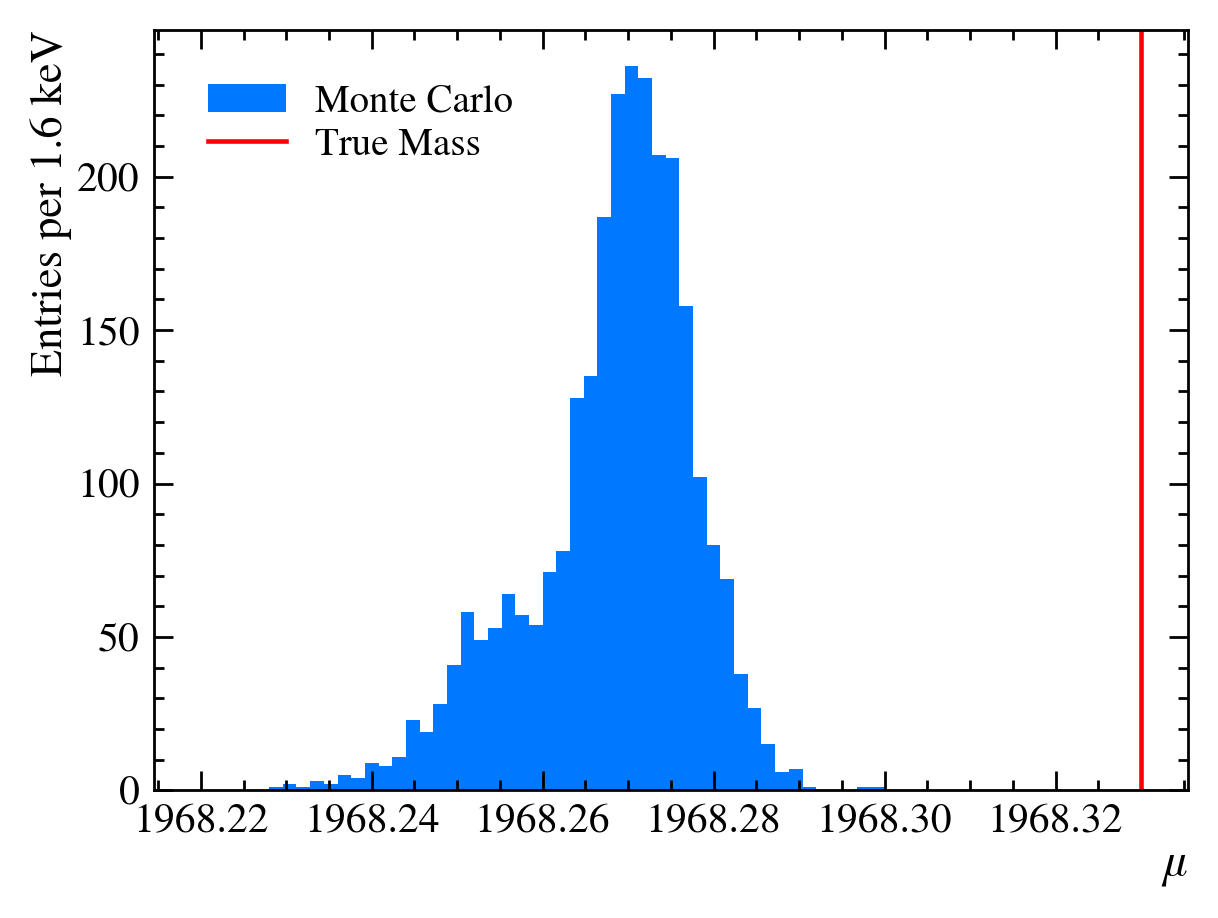

In [46]:
plt.hist(crys_mu_val,range=(1968.22, 1968.3),bins=50, label='Monte Carlo')
plt.axvline(x = 1968.33, color = 'r', label = 'True Mass')
plt.ylabel('Entries per 1.6 keV')
plt.xlabel(r"$\mu$")
plt.ticklabel_format(useOffset=False)
plt.legend()
plt.show()

In [49]:
print(f"{np.mean(crys_diff_val)} +- {np.mean(crys_diff_err)}")

98.6894454537895 +- 0.008159328723029314


In [43]:
(98.75-98.62)/50

0.0025999999999999092

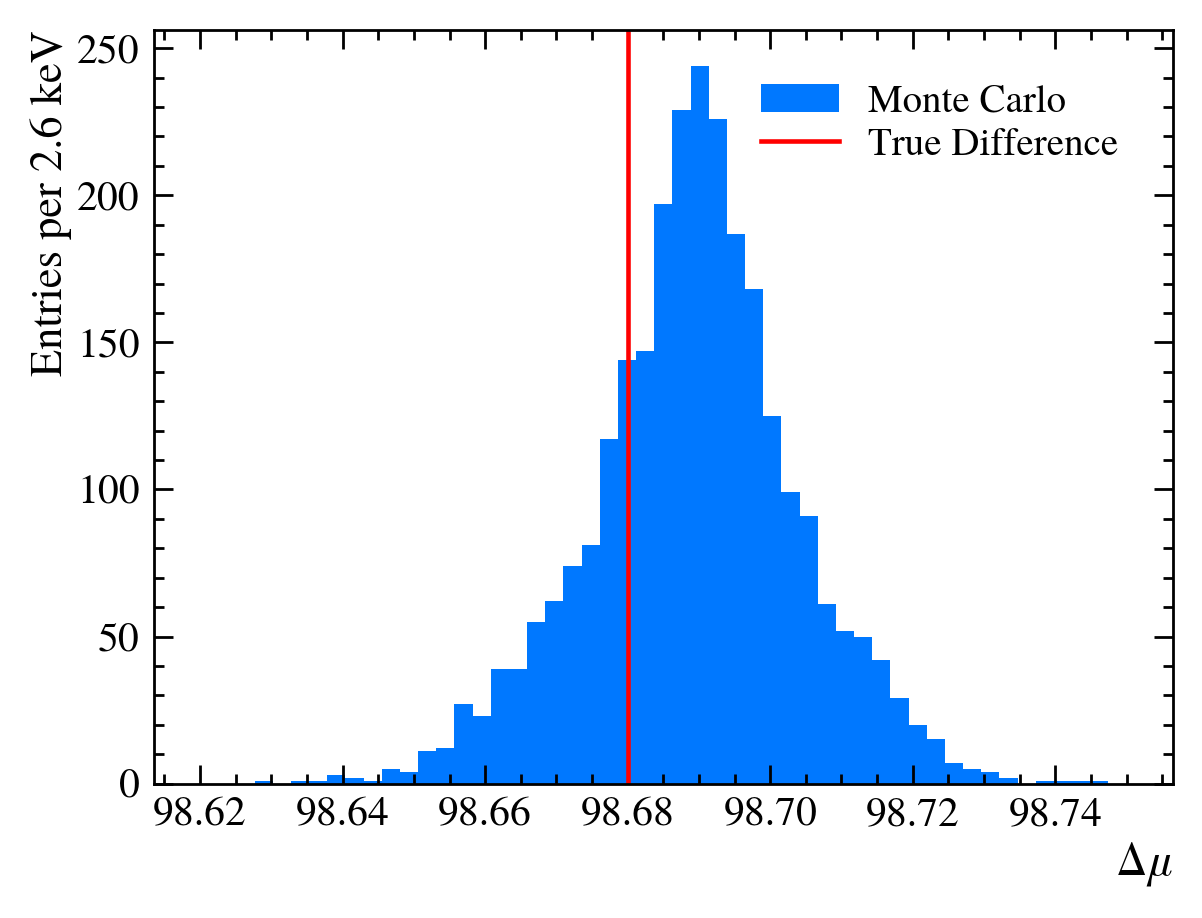

In [45]:
plt.hist(crys_diff_val,bins=51, range=(98.62, 98.75), label = 'Monte Carlo')
plt.axvline(x = 1968.33 - 1869.65, color = 'r', label = 'True Difference')
plt.ylabel('Entries per 2.6 keV')
plt.xlabel(r"$\Delta\mu$")
plt.ticklabel_format(useOffset=False)
plt.legend()
plt.show()

In [44]:
conv_mu_val = np.fromfile('mc_results/conv_mu_val')
conv_mu_err = np.fromfile('mc_results/conv_mu_err')
conv_diff_val = np.fromfile('mc_results/conv_diff_val')
conv_diff_err = np.fromfile('mc_results/conv_diff_err')

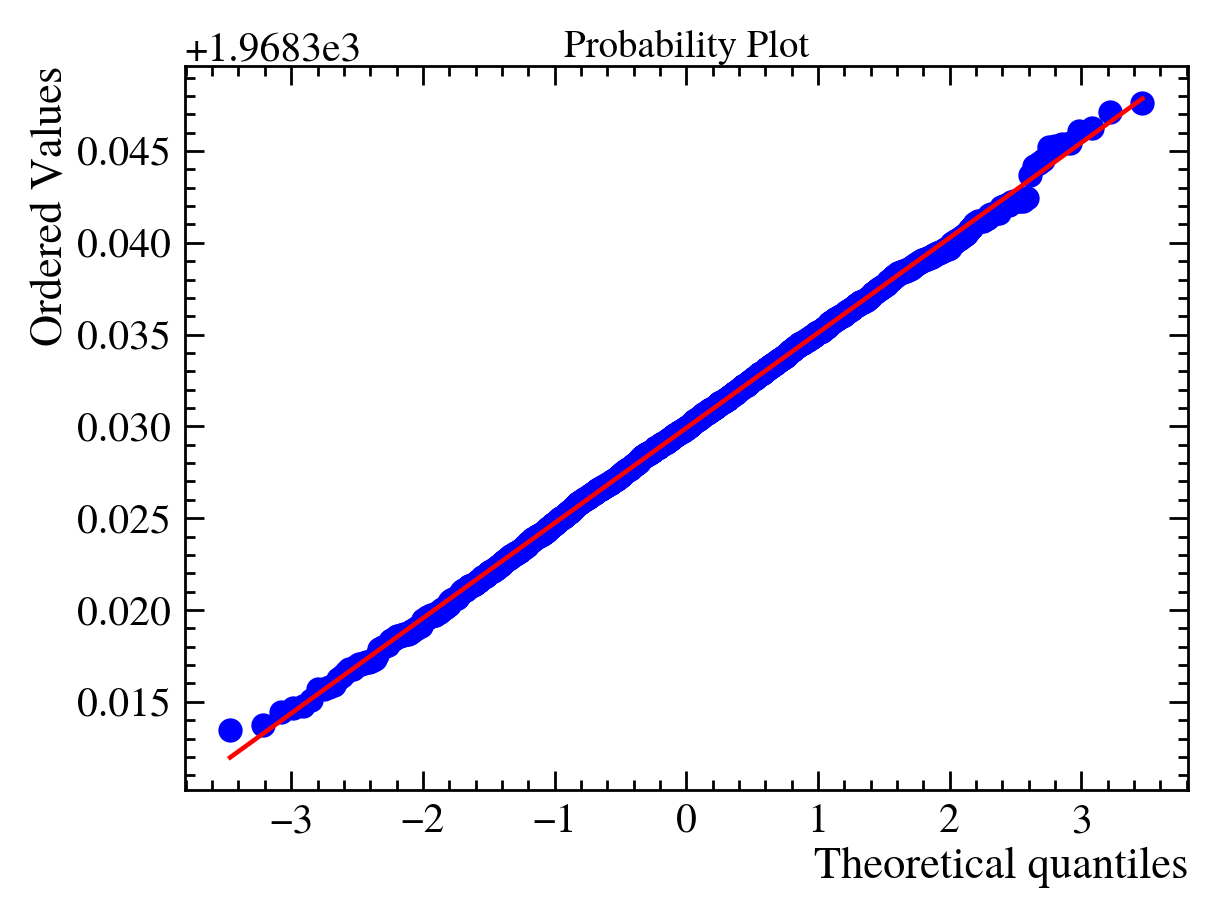

In [19]:
import scipy.stats as stats
  
stats.probplot(conv_mu_val, dist="norm", plot=plt)
plt.show()

In [20]:
(lambda a: np.mean(a[1:] - a[:-1]))(np.histogram(conv_mu_val,bins=50)[1])

0.0006830757393618115

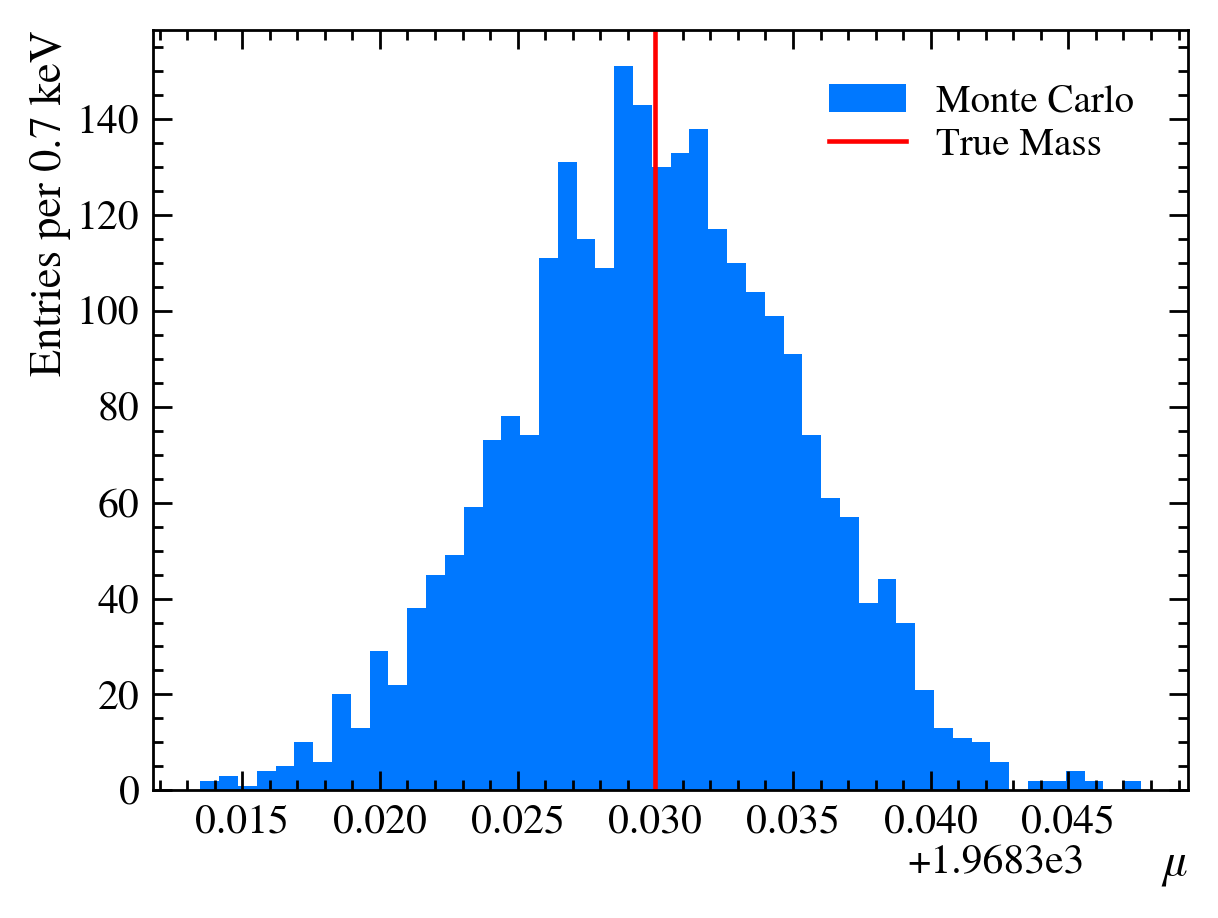

In [21]:
plt.hist(conv_mu_val,bins=50, label='Monte Carlo')
plt.axvline(x = 1968.33, color = 'r', label = 'True Mass')
plt.ylabel('Entries per 0.7 keV')
plt.xlabel(r"$\mu$")
#plt.ticklabel_format(useOffset=False)
plt.gca().xaxis.get_offset_text().set_position((0.9,0))
plt.legend()
plt.show()

In [22]:
(lambda a: np.mean(a[1:] - a[:-1]))(np.histogram(conv_diff_val,bins=50)[1])

0.0009812398965050307

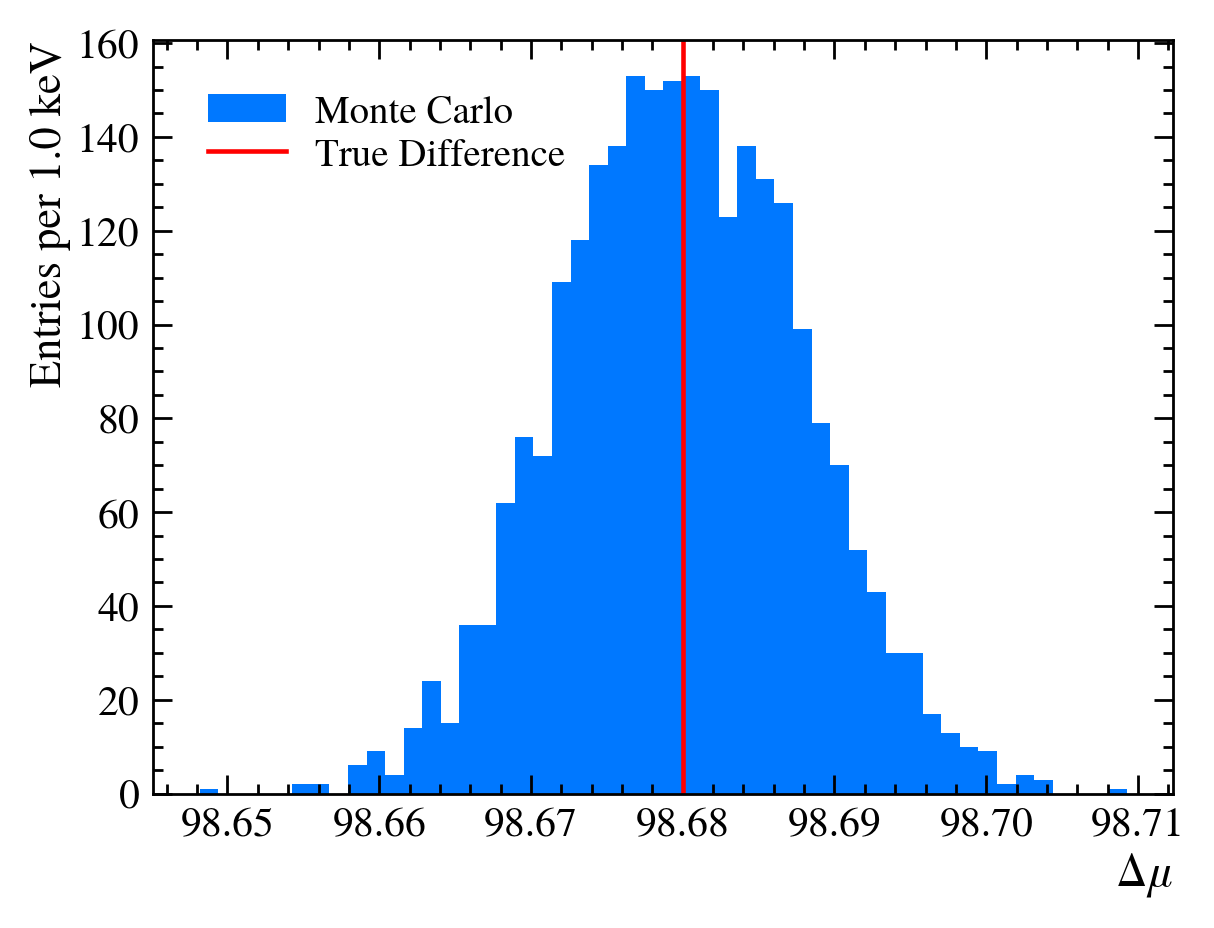

In [45]:
plt.hist(conv_diff_val,bins=50, label = 'Monte Carlo')
plt.axvline(x = 1968.33 - 1869.65, color = 'r', label = 'True Difference')
plt.ylabel('Entries per 1.0 keV')
plt.xlabel(r"$\Delta\mu$")
plt.ticklabel_format(useOffset=False)
plt.legend()
plt.show()

In [45]:
np.std(conv_diff_val)

0.008008810708012586

In [58]:
print('Var name - mean - std')
[(lambda name: print(f"{name} - {np.mean(globals()[name]):.5f} - {np.std(globals()[name]):.7f}"))(name) for name in ['crys_mu_val', 'conv_mu_val','crys_diff_val','conv_diff_val']][0]

Var name - mean - std
crys_mu_val - 1968.26837 - 0.0106518
conv_mu_val - 1968.32991 - 0.0051755
crys_diff_val - 98.68945 - 0.0152327
conv_diff_val - 98.67928 - 0.0080088


In [54]:
np.mean(crys_diff_err)

0.008159328723029314

Text(0.5, 1.0, 'Histogram of Hesse Error estimates')

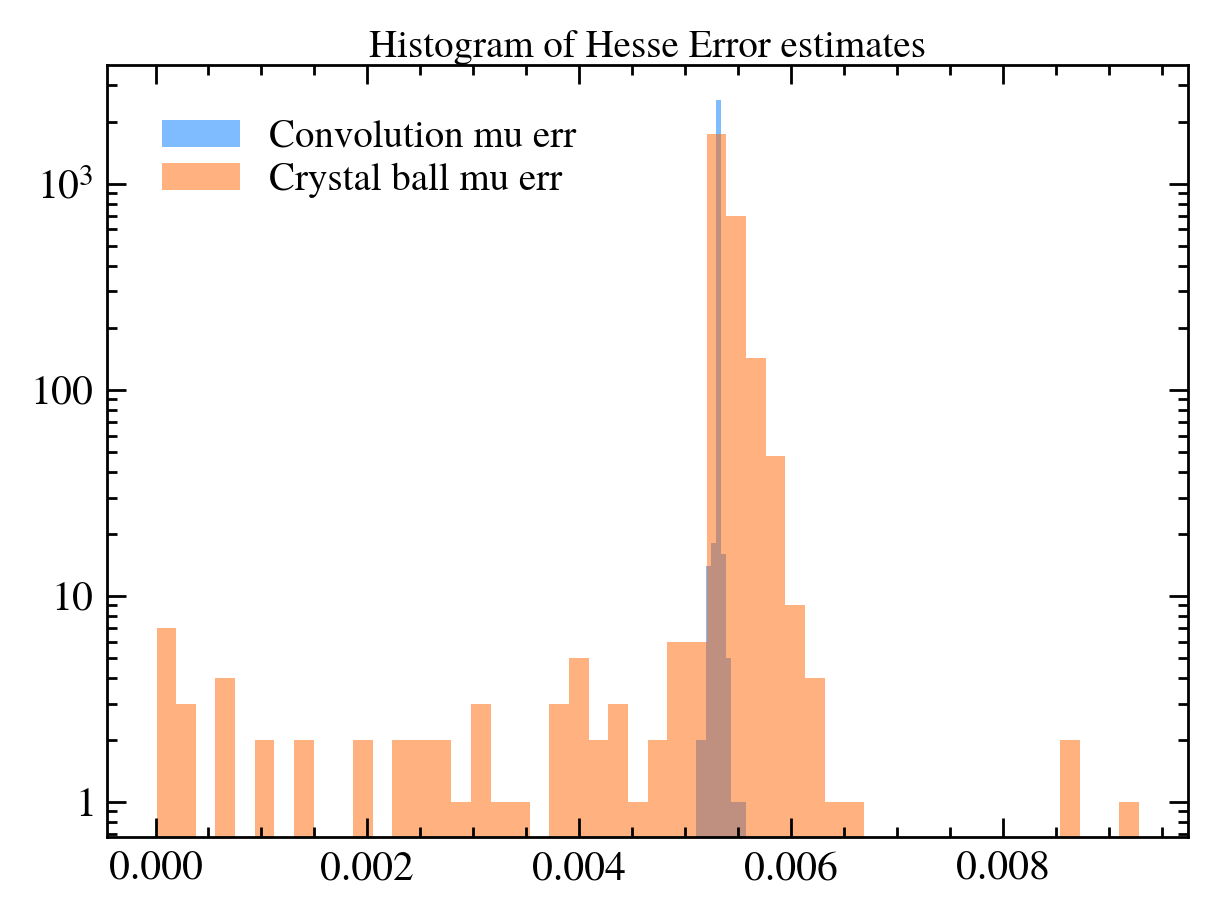

In [50]:
plt.hist(conv_mu_err,alpha=0.5,bins=10,label='Convolution mu err')
plt.hist(crys_mu_err,alpha=0.5,bins=50,label='Crystal ball mu err')
plt.yscale('log')
plt.legend()
plt.title('Histogram of Hesse Error estimates')

In [118]:
import fitlib
gfit = fitlib.Fitter(crys_mu_val)

In [119]:
w = fitlib.f(0,0.2,1)
w2 = fitlib.f(0,0.2,1)

In [120]:
gfit.pdf = [fitlib.Normal(n=w,mu=(1968.22, 1968.3)),
            fitlib.Normal(n=w2*(1-w),mu=(1968.22, 1968.3)),
            fitlib.Normal(n=1-w-w2*(1-w),mu=(1968.22, 1968.3))]

In [121]:
gfit.MLE(999999)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -1.763e+04                 │             Nfcn = 1320              │
│ EDM = 7.26e-05 (Goal: 0.0002)    │            time = 0.8 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x0   │   0.433   │   0.026   │            │            │    0    │    1    │       │
│ 1 │ x1   │1.9682634e3│0.0000006e3│            │            │ 1968.22 │ 1968.3  │       │
│ 2 │ x2   │ 12.65e-3  │  0.32e-3  │            │            │    0    │         │       │
│ 3 │ x3   │   0.967   │   0.019   │            │            │    0    │    1    │       │
│ 4 │ x4   │1.96827178e3│0.00000022e3│            │            │ 1968.22 │ 1968.3  │       │
│ 5 │ x5   │  4.80e-3  │  0.24e-3  │            │            │    0    │         │       │
│ 6 │ x6   │1.9682821e3│0.0000009e3│            │            │ 1968.22 │ 1968.3  │       │
│ 7 │ x7   │  2.0e-3   │  0.6e-3   │            │            │    0    │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬─────────────────────────────────────────────────────────────────────────┐
│    │       x0       x1       x2       x3       x4       x5       x6       x7 │
├────┼─────────────────────────────────────────────────────────────────────────┤
│ x0 │ 0.000669  9.95e-6 -2.71e-6 -0.04e-3  1.11e-6 -3.12e-6  -4.1e-6  -1.3e-6 │
│ x1 │  9.95e-6 3.46e-07 -0.02e-6  0.77e-6        0 -0.04e-6 -0.08e-6 -0.06e-6 │
│ x2 │ -2.71e-6 -0.02e-6    1e-07  1.05e-6 -0.02e-6  0.02e-6       -0 -0.02e-6 │
│ x3 │ -0.04e-3  0.77e-6  1.05e-6 0.000347  1.95e-6  2.82e-6   9.1e-6  -6.6e-6 │
│ x4 │  1.11e-6        0 -0.02e-6  1.95e-6 4.82e-08  0.01e-6  0.07e-6 -0.04e-6 │
│ x5 │ -3.12e-6 -0.04e-6  0.02e-6  2.82e-6  0.01e-6 5.56e-08  0.08e-6 -0.04e-6 │
│ x6 │  -4.1e-6 -0.08e-6       -0   9.1e-6  0.07e-6  0.08e-6 8.17e-07  -0.2e-6 │
│ x7 │  -1.3e-6 -0.06e-6 -0.02e-6  -6.6e-6 -0.04e-6 -0.04e-6  -0.2e-6 4.12e-07 │
└────┴─────────────────────────────────────────────────────────────────────────┘

In [122]:
gfit.values()

[{'n': 0.4332478701594289,
  'mu': 1968.263360974271,
  'sigma': 0.012648847254533626},
 {'n': [0.9666089709153001, [0.4332478701594289]],
  'mu': 1968.2717809881963,
  'sigma': 0.004801165828278026},
 {'n': [[0.4332478701594289], [0.9666089709153001, [0.4332478701594289]]],
  'mu': 1968.2820644212998,
  'sigma': 0.00195326431365646}]

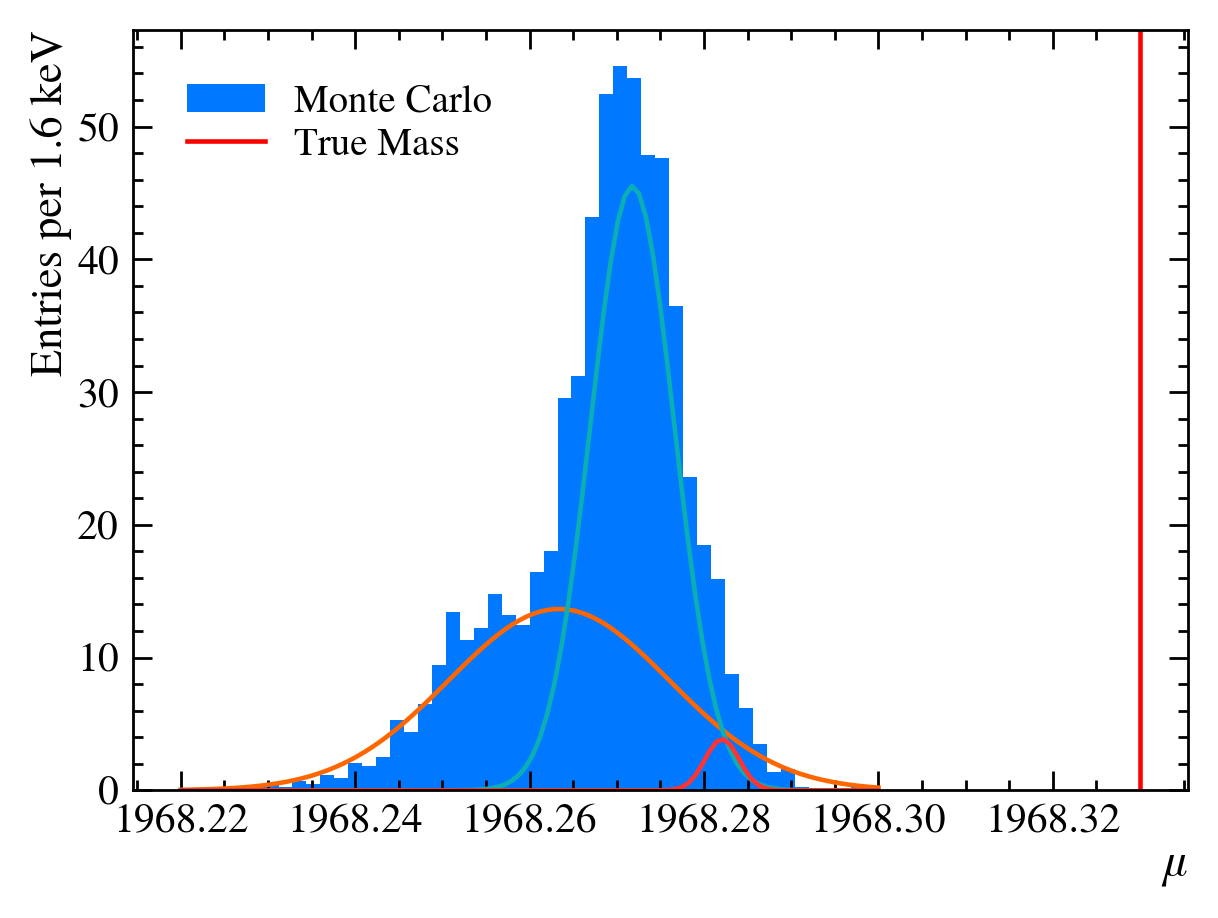

In [132]:
x = np.linspace(1968.22, 1968.3, 100)
plt.hist(crys_mu_val,range=(1968.22, 1968.3),bins=50, label='Monte Carlo',density=True)
plt.plot(x,gfit.pdf[0].call(x))
plt.plot(x,gfit.pdf[1].call(x))
plt.plot(x,gfit.pdf[2].call(x))
plt.axvline(x = 1968.33, color = 'r', label = 'True Mass')
plt.ylabel('Entries per 1.6 keV')
plt.xlabel(r"$\mu$")
plt.ticklabel_format(useOffset=False)
plt.legend()
plt.show()

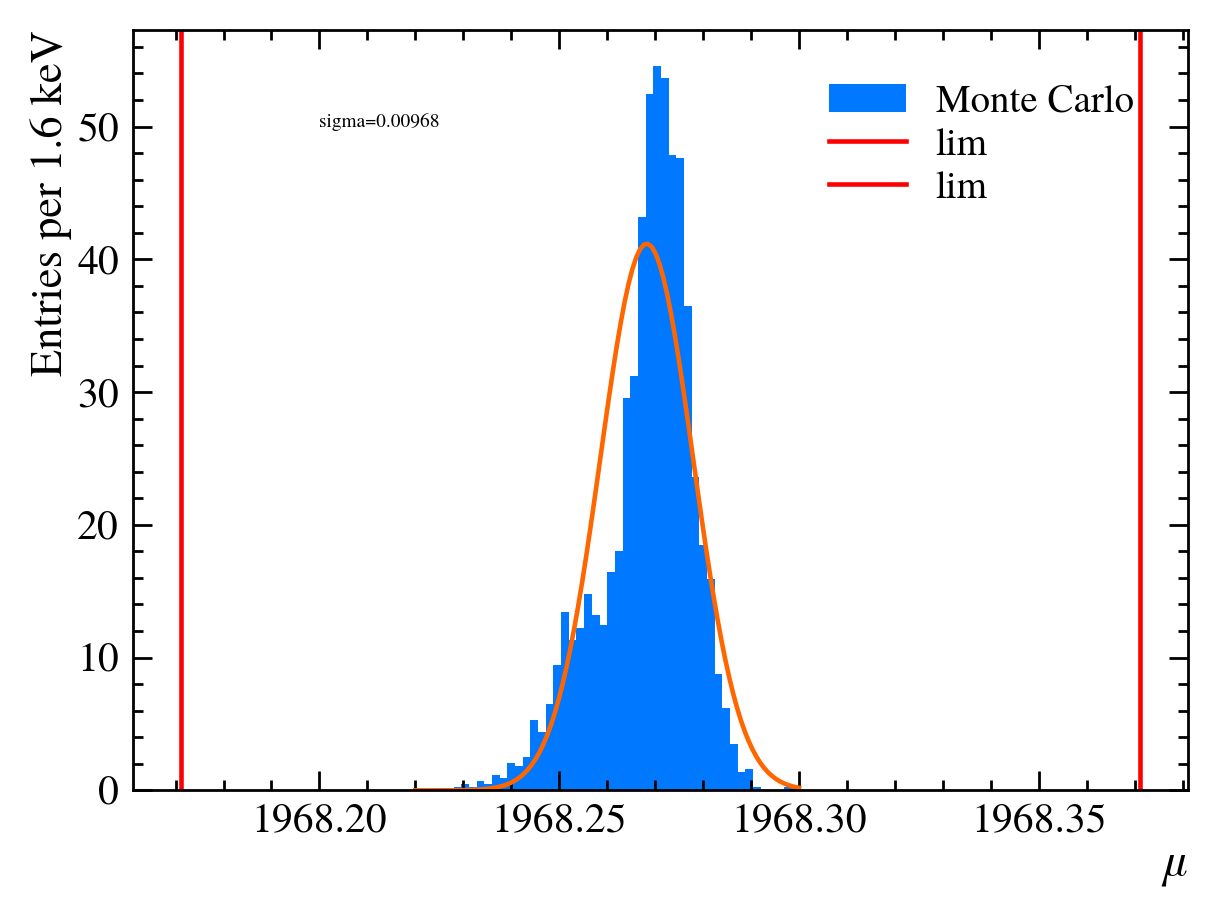

In [149]:
lims = (lambda c,v: (c-v,c+v))(1968.2711032501848, 0.1)
gfit2 = fitlib.Fitter(crys_mu_val,range=lims)
gfit2.pdf = [fitlib.Normal(n=1,mu=lims)]
gfit2.MLE()
x = np.linspace(1968.22, 1968.3, 100)
plt.hist(crys_mu_val,range=(1968.22, 1968.3),bins=50, label='Monte Carlo',density=True)
plt.plot(x,gfit2.pdf[0].call(x))
plt.axvline(x = lims[0], color = 'r', label = 'lim')
plt.axvline(x = lims[1], color = 'r', label = 'lim')
plt.ylabel('Entries per 1.6 keV')
plt.xlabel(r"$\mu$")
plt.ticklabel_format(useOffset=False)
plt.legend()
plt.text(1968.2,50,f"sigma={gfit2.values()[0]['sigma']:.5f}")
plt.show()

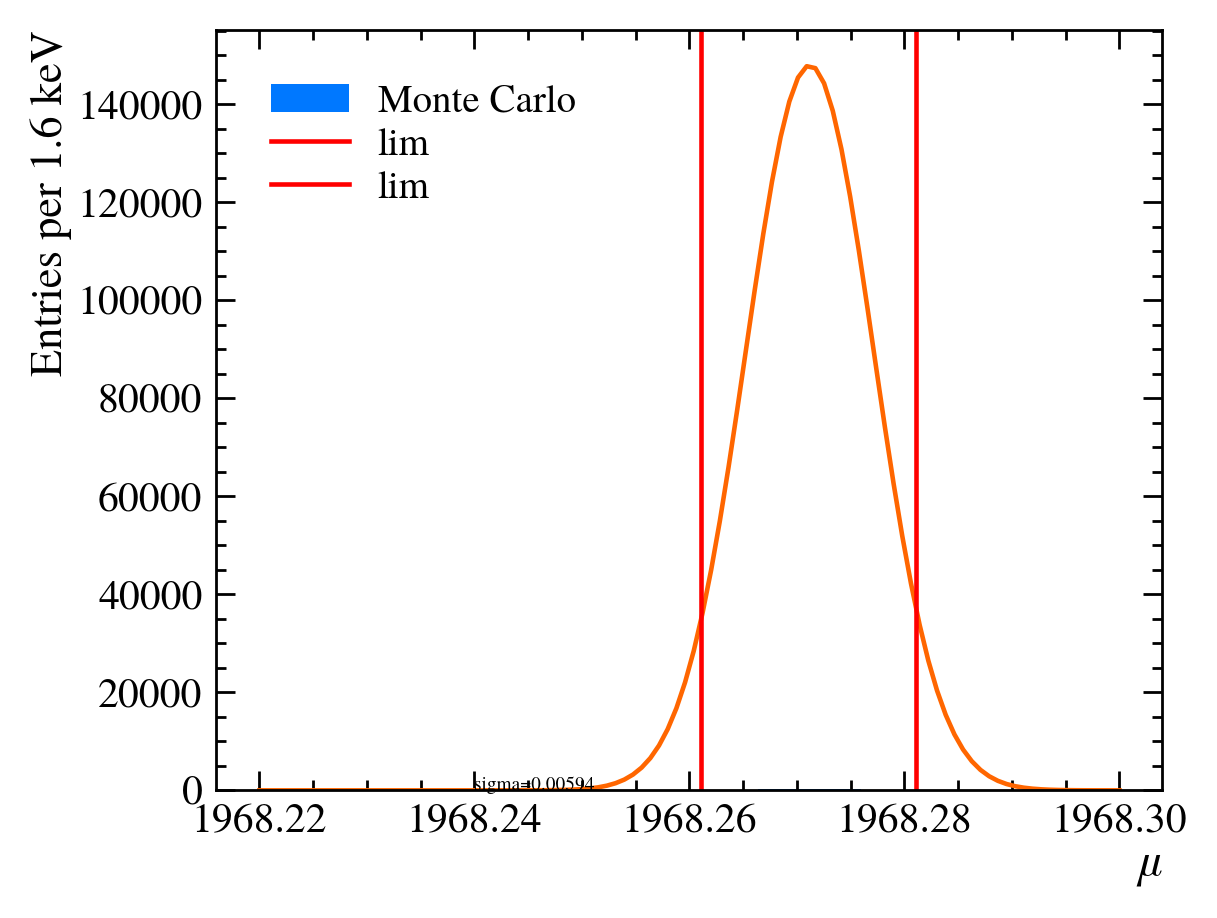

In [157]:
lims = (lambda c,v: (c-v,c+v))(1968.2711032501848, 0.01)
gfit2 = fitlib.Fitter.binned(crys_mu_val,range=lims,bins=260)
gfit2.pdf = [fitlib.Normal(mu=lims)]
gfit2.chi2()
x = np.linspace(1968.22, 1968.3, 100)
plt.hist(crys_mu_val,range=(1968.22, 1968.3),bins=50, label='Monte Carlo')
plt.plot(x,gfit2.pdf[0].call(x))
plt.axvline(x = lims[0], color = 'r', label = 'lim')
plt.axvline(x = lims[1], color = 'r', label = 'lim')
plt.ylabel('Entries per 1.6 keV')
plt.xlabel(r"$\mu$")
plt.ticklabel_format(useOffset=False)
plt.legend()
plt.text(1968.24,50,f"sigma={gfit2.values()[0]['sigma']:.5f}")
plt.show()

In [68]:
from scipy.stats import crystalball

In [69]:
def CrystalBall(n,alpha,beta,mu,sigma):
    return fitlib.Fit_function(lambda x,n,a,b,m,s: n*crystalball.pdf(x,a,b,loc=m,scale=s),
                              [n,alpha,beta,mu,sigma])

In [82]:
import uproot
import vector
Dp_tree=uproot.open("./data/Dp_subset.root")['t']

Dp_ssK_TRUEP_E = np.asarray(Dp_tree["ssK_TRUEP_E"])
Dp_ssK_TRUEP_X = np.asarray(Dp_tree["ssK_TRUEP_X"])
Dp_ssK_TRUEP_Y = np.asarray(Dp_tree["ssK_TRUEP_Y"])
Dp_ssK_TRUEP_Z = np.asarray(Dp_tree["ssK_TRUEP_Z"])

Dp_osK_TRUEP_E = np.asarray(Dp_tree["osK_TRUEP_E"])
Dp_osK_TRUEP_X = np.asarray(Dp_tree["osK_TRUEP_X"])
Dp_osK_TRUEP_Y = np.asarray(Dp_tree["osK_TRUEP_Y"])
Dp_osK_TRUEP_Z = np.asarray(Dp_tree["osK_TRUEP_Z"])

Dp_sspi_TRUEP_E = np.asarray(Dp_tree["sspi_TRUEP_E"])
Dp_sspi_TRUEP_X = np.asarray(Dp_tree["sspi_TRUEP_X"])
Dp_sspi_TRUEP_Y = np.asarray(Dp_tree["sspi_TRUEP_Y"])
Dp_sspi_TRUEP_Z = np.asarray(Dp_tree["sspi_TRUEP_Z"])

Dp_ssK_vec   = vector.array({"px": Dp_ssK_TRUEP_X, "py":Dp_ssK_TRUEP_Y, "pz":Dp_ssK_TRUEP_Z, "E":Dp_ssK_TRUEP_E})
Dp_osK_vec   = vector.array({"px": Dp_osK_TRUEP_X, "py":Dp_osK_TRUEP_Y, "pz":Dp_osK_TRUEP_Z, "E":Dp_osK_TRUEP_E})
Dp_sspi_vec  = vector.array({"px": Dp_sspi_TRUEP_X, "py":Dp_sspi_TRUEP_Y, "pz":Dp_sspi_TRUEP_Z, "E":Dp_sspi_TRUEP_E})

Dp_mother_vec = Dp_ssK_vec + Dp_osK_vec + Dp_sspi_vec
Dp_mother_mass = Dp_mother_vec.mass

Ds_tree=uproot.open("./data/Ds_subset.root")["t"]

Ds_ssK_TRUEP_E = np.asarray(Ds_tree["ssK_TRUEP_E"])
Ds_ssK_TRUEP_X = np.asarray(Ds_tree["ssK_TRUEP_X"])
Ds_ssK_TRUEP_Y = np.asarray(Ds_tree["ssK_TRUEP_Y"])
Ds_ssK_TRUEP_Z = np.asarray(Ds_tree["ssK_TRUEP_Z"])

Ds_osK_TRUEP_E = np.asarray(Ds_tree["osK_TRUEP_E"])
Ds_osK_TRUEP_X = np.asarray(Ds_tree["osK_TRUEP_X"])
Ds_osK_TRUEP_Y = np.asarray(Ds_tree["osK_TRUEP_Y"])
Ds_osK_TRUEP_Z = np.asarray(Ds_tree["osK_TRUEP_Z"])

Ds_sspi_TRUEP_E = np.asarray(Ds_tree["sspi_TRUEP_E"])
Ds_sspi_TRUEP_X = np.asarray(Ds_tree["sspi_TRUEP_X"])
Ds_sspi_TRUEP_Y = np.asarray(Ds_tree["sspi_TRUEP_Y"])
Ds_sspi_TRUEP_Z = np.asarray(Ds_tree["sspi_TRUEP_Z"])

Ds_ssK_vec   = vector.array({"px": Ds_ssK_TRUEP_X, "py":Ds_ssK_TRUEP_Y, "pz":Ds_ssK_TRUEP_Z, "E":Ds_ssK_TRUEP_E})
Ds_osK_vec   = vector.array({"px": Ds_osK_TRUEP_X, "py":Ds_osK_TRUEP_Y, "pz":Ds_osK_TRUEP_Z, "E":Ds_osK_TRUEP_E})
Ds_sspi_vec  = vector.array({"px": Ds_sspi_TRUEP_X, "py":Ds_sspi_TRUEP_Y, "pz":Ds_sspi_TRUEP_Z, "E":Ds_sspi_TRUEP_E})

Ds_mother_vec = Ds_ssK_vec + Ds_osK_vec + Ds_sspi_vec
Ds_mother_mass = Ds_mother_vec.mass

In [85]:
f = uproot.open("./data/MERR.root")
Dp_DTF_MERR = f['DecayTree']["Dp_DTF_MERR"].array()

In [88]:
def sample():
    raw_data_dp = np.random.choice(Dp_mother_mass, size=800000) + np.multiply(np.random.choice(Dp_DTF_MERR,800000),np.random.randn(800000)) 
    raw_data_ds = np.random.choice(Ds_mother_mass, size=1000000) + np.multiply(np.random.choice(Dp_DTF_MERR,1000000),np.random.randn(1000000))
    background = np.random.exponential(150, 60000)+1840
    return np.concatenate([raw_data_dp,raw_data_ds,background])

In [96]:
f = fitlib.f
fitter = fitlib.Fitter.binned(sample(), bins=200,range=(1840,2040))
fitter.mu = f(1950,2000)
fitter.diff = f(0,100,200)

fitter.pdf=[
    CrystalBall(alpha=f(0.5,10), beta=f(1,3,30), n=f(0,10000,np.inf),mu=fitter.mu - fitter.diff, sigma=f(1,40)),
    fitlib.Normal(n=f(0,10000,np.inf),mu=fitter.mu - fitter.diff, sigma=f(1,40)),
    
    CrystalBall(alpha=f(0.5,10), beta=f(1,3,30), n=f(0,10000,np.inf),mu=fitter.mu, sigma=f(1,40)),
    fitlib.Normal(n=f(0,10000,np.inf),mu=fitter.mu, sigma=f(1,40)),
    
    fitlib.Exp(n=f(0,10000,np.inf), x0=f(1840), a=f(0.0001,300))
]
fitter.chi2(999999)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 228.3                      │             Nfcn = 7020              │
│ EDM = 2e-05 (Goal: 0.0002)       │            time = 5.4 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x0   │   384e3   │   10e3    │            │            │    0    │         │       │
│ 1 │ x1   │   2.44    │   0.04    │            │            │   0.5   │   10    │       │
│ 2 │ x2   │   1.21    │   0.12    │            │            │    1    │   30    │       │
│ 3 │ x3   │1.968277e3 │0.000005e3 │            │            │  1950   │  2000   │       │
│ 4 │ x4   │  98.684   │   0.008   │            │            │    0    │   200   │       │
│ 5 │ x5   │   4.289   │   0.025   │            │            │    1    │   40    │       │
│ 6 │ x6   │   416e3   │   10e3    │            │            │    0    │         │       │
│ 7 │ x7   │   5.821   │   0.025   │            │            │    1    │   40    │       │
│ 8 │ x8   │  0.783e6  │  0.017e6  │            │            │    0    │         │       │
│ 9 │ x9   │   2.515   │   0.013   │            │            │   0.5   │   10    │       │
│ 10│ x10  │  1.0157   │  0.0011   │            │            │    1    │   30    │       │
│ 11│ x11  │   4.404   │   0.019   │            │            │    1    │   40    │       │
│ 12│ x12  │  0.435e6  │  0.011e6  │            │            │    0    │         │       │
│ 13│ x13  │   6.034   │   0.028   │            │            │    1    │   40    │       │
│ 14│ x14  │  63.5e3   │   0.6e3   │            │            │    0    │         │       │
│ 15│ x15  │  1.840e3  │  0.018e3  │            │            │         │         │  yes  │
│ 16│ x16  │   135.4   │    2.8    │            │            │ 0.0001  │   300   │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│     │          x0          x1          x2          x3          x4          x5          x6          x7          x8          x9         x10         x11         x12         x13         x14         x15         x16 │
├─────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│  x0 │    9.54e+07    213.2722    -435.018  812.369e-3     8.92239    114.8097     -0.07e9    185.4579           0   -12.15083 163.5636e-3   104.14e-3           0     -7.9265     -0.43e6           0     6.054e3 │
│  x1 │    213.2722      0.0018     -0.0044           0     0.08e-3     -0.3e-3     27.2048      0.3e-3      3.0470    -0.01e-3      0.2e-6           0     -0.3911          -0     -0.7377      0.0000      0.0052 │
│  x2 │    -435.018     -0.0044      0.0154   -0.016e-3    -0.16e-3      1.4e-3    -470.533           0    

In [97]:
fitter.values()

[{'n': 383935.29390517366,
  'a': 2.4362432892819323,
  'b': 1.208625207600762,
  'm': [1968.2771000982711, 98.68361376899622],
  's': 4.289174634699041},
 {'n': 416292.383425905,
  'mu': [1968.2771000982711, 98.68361376899622],
  'sigma': 5.820770722996763},
 {'n': 782515.9081315286,
  'a': 2.5153968373629483,
  'b': 1.0156500225376908,
  'm': 1968.2771000982711,
  's': 4.403556267337336},
 {'n': 434576.32212106383,
  'mu': 1968.2771000982711,
  'sigma': 6.033692761175182},
 {'n': 63491.308338772295, 'x0': 1840.0, 'a': 135.3694543079954}]

In [98]:
na = fitter.values()[2]['n']
nb = fitter.values()[3]['n']
nab = na + nb
sa = fitter.values()[2]['s']
sb = fitter.values()[3]['sigma']

np.sqrt( sa**2*na/nab + sb**2*nb/nab )/ np.sqrt(nab)

0.004574272140518241

In [106]:
np.sqrt( (sa**2*na/nab + sb**2*nb/nab)/nab + (1968.33 - fitter.mu.value)**2 )

0.05309730283667876

In [105]:
1968.33- fitter.mu.value

0.052899901728778786